# Programming Exercise 2: Logistic Regression

## Introduction
In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.
To get started with the exercise, you will need to download the starter code and unzip its contents to the directory where you wish to complete the exercise. If needed, use the cd command in Octave/MATLAB to change to this directory before starting this exercise.
You can also find instructions for installing Octave/MATLAB in the “Environment Setup Instructions” of the course website.

## 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in ex2.m will guide you through the exercise.

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of ex2.m, the code will load the data and display it on a 2-dimensional plot by calling the function plotData.
You will now complete the code in plotData so that it displays a figure like Figure 1, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [24]:
# plotData.m
function plotData(X, y)
    figure; hold on;
    idPos = find(y==1);
    idNeg = find(y==0);

    %pos: positive examples from training set (meaning the student passes)
    pos = X(idPos,1:2);
    %neg: negative examples from training set (meaning the student fails)
    neg = X(idNeg,1:2);

    plot(pos(:,1),pos(:,2),"k+","LineWidth",3);
    plot(neg(:,1),neg(:,2),"yo","LineWidth",3);
    hold off;

end

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


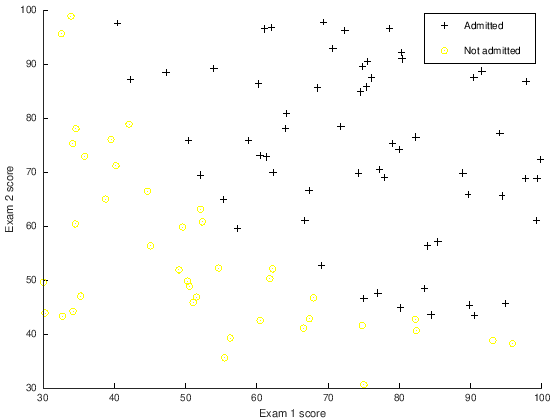

In [25]:
data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
                
                hθ(x) = g(θTx)

where function g is the sigmoid function. The sigmoid function is defined as:

                g(z) = 1/1+exp(-z)

Your first step is to implement this function in sigmoid.m so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x) at the Octave/MATLAB command line. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

   You can submit your solution for grading by typing submit at the Octave/MATLAB command line. The submission script will prompt you for
your login e-mail and submission token and ask you which files you want to submit. You can obtain a submission token from the web page for the assignment.

In [26]:
% sigmoid.m
function g = sigmoid(z)
    %SIGMOID Compute sigmoid function
    %   g = SIGMOID(z) computes the sigmoid of z.

    % You need to return the following variables correctly 
    g = zeros(size(z));

    g = 1./(1+exp(-z));

end

In [27]:
sigmoid(0)

ans =  0.50000


#### 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression.
Complete the code in costFunction.m to return the cost and gradient.
Recall that the cost function in logistic regression is (check pdf),
and the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n) is defined as follows: (check pdf)

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of h θ (x).
Once you are done, ex2.m will call your costFunction using the initial
parameters of θ. You should see that the cost is about **0.693**
    

In [28]:
% CostFunction.m
function [J, grad] = costFunction(theta, X, y)
    %COSTFUNCTION Compute cost and gradient for logistic regression
    %   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    %   parameter for logistic regression and the gradient of the cost
    %   w.r.t. to the parameters.

    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    h = sigmoid(X * theta);
    %cost function
    J = 1/m*sum((-y'*log(h))-(1-y)'*log(1-h))
    %gradient descent
    grad = 1/m * (X' * (h-y));

end

In [29]:
%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, X, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

J =  0.69315
Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628
J =  0.21833

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


#### 1.2.3 Learning parameters using *fminunc*

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly.
This time, instead of taking gradient descent steps, you will use an Octave/MATLAB built-in function called fminunc.
Octave/MATLAB’s fminunc is an optimization solver that finds the min-
imum of an unconstrained 2 function. For logistic regression, you want to optimize the cost function J(θ) with parameters θ.
Concretely, you are going to use fminunc to find the best parameters θ
for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to fminunc the following inputs:
- The initial values of the parameters we are trying to optimize.
- A function that, when given the training set and a particular θ, computes the logistic regression cost and gradient with respect to θ for the dataset (X, y)

In ex2.m, we already have code written to call fminunc with the correct arguments.

In [13]:
% % Set options for fminunc
% options = optimset('GradObj', 'on', 'MaxIter', 400);
% % Run fminunc to obtain the optimal theta
% % This function will return theta and the cost
% [theta, cost] = ...
% fminunc(@(t)(costFunction(t, X, y)), initial theta, options);

In this code snippet, we first defined the options to be used with fminunc.
Specifically, we set the GradObj option to on, which tells fminunc that our function returns both the cost and the gradient. This allows fminunc to use the gradient when minimizing the function. Furthermore, we set the MaxIter option to 400, so that fminunc will run for at most 400 steps before it terminates.

To specify the actual function we are minimizing, we use a “short-hand” for specifying functions with the **@(t) (costFunction(t, X, y)).** This creates a function, with argument t, which calls your costFunction. This allows us to wrap the costFunction for use with fminunc.

If you have completed the costFunction correctly, fminunc will converge on the right optimization parameters and return the final values of the cost and θ. Notice that by using fminunc, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by fminunc: you only needed to provide a function calculating the cost and the gradient.

Once fminunc completes, ex2.m will call your costFunction function
using the optimal parameters of θ. You should see that the cost is about 0.203.

This final θ value will then be used to plot the decision boundary on the training data, resulting in a figure similar to Figure 2. We also encourage you to look at the code in plotDecisionBoundary.m to see how to plot such a boundary using the θ values.

In [30]:
%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

J =  0.69315
J =  0.69315
J =  3.0133
J =  1.5207
J =  0.73361
J =  0.64053
J =  0.64053
J =  0.62985
J =  0.62985
J =  0.62931
J =  0.62931
J =  0.62903
J =  0.62903
J =  0.62785
J =  0.62785
J =  0.62719
J =  0.62719
J =  0.62624
J =  0.62624
J =  0.62493
J =  0.62493
J =  0.62309
J =  0.62309
J =  0.62050
J =  0.62050
J =  0.61685
J =  0.61685
J =  0.61176
J =  0.61176
J =  0.60463
J =  0.60463
J =  0.59474
J =  0.59474
J =  0.58104
J =  0.58104
J =  0.56554
J =  0.56554
J =  0.53773
J =  0.53773
J =  0.50443
J =  0.50443
J =  0.46260
J =  0.46260
J =  0.41252
J =  0.41252
J =  0.35699
J =  0.35699
J =  0.30172
J =  0.30172
J =  0.25401
J =  0.25401
J =  0.22286
J =  0.22286
J =  0.20958
J =  0.20958
J =  0.20468
J =  0.20468
J =  0.20364
J =  0.20364
J =  0.20353
J =  0.20353
J =  0.20351
J =  0.20351
J =  0.20350
J =  0.20350
J =  0.20350
J =  0.20350
J =  0.20350
J =  0.20350
J =  0.20350
Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 


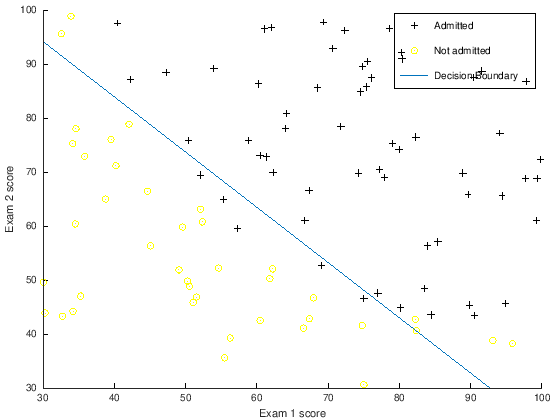

In [32]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')

#### 1.2.4 Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.
Another way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict.m. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.
After you have completed the code in predict.m, the ex2.m script will
proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [33]:
function p = predict(theta, X)
    %PREDICT Predict whether the label is 0 or 1 using learned logistic 
    %regression parameters theta
    %   p = PREDICT(theta, X) computes the predictions for X using a 
    %   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m = size(X, 1); % Number of training examples

    % initialize p
    p = zeros(m, 1);
    
    p = sigmoid(X*theta)>=0.5;

end

In [34]:
%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n'], prob);
fprintf('Expected value: 0.775 +/- 0.002\n\n');

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (approx): 89.0\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776289
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


## 2 Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### 2.1 Visualizing the data

Similar to the previous parts of this exercise, plotData is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

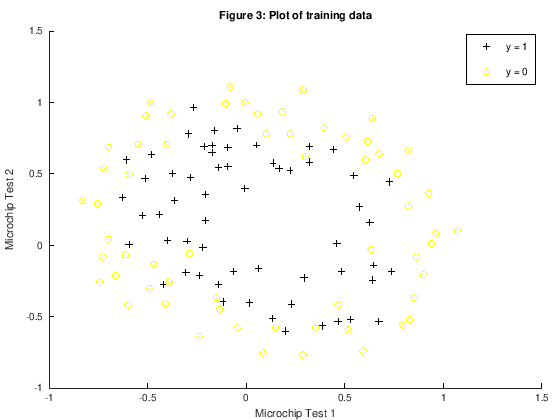

In [37]:
%% Load Data
%  The first two columns contains the X values and the third column
%  contains the label (y).

data = load('ex2data2.txt');
X = data(:, [1, 2]); y = data(:, 3);

plotData(X, y);

% Put some labels
hold on;

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
title('Figure 3: Plot of training data')

% Specified in plot order
legend('y = 1', 'y = 0')
hold off;

Figure 3 shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2  Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function mapFeature.m, we will map the features into all polynomial terms of x 1 and x 2 up to the sixth power.

        mapFeature(x) = [1 x1 x2 x1² x1x2 x2² ... x2^6]
        
As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

In [38]:
function out = mapFeature(X1, X2)
    % MAPFEATURE Feature mapping function to polynomial features
    %
    %   MAPFEATURE(X1, X2) maps the two input features
    %   to quadratic features used in the regularization exercise.
    %
    %   Returns a new feature array with more features, comprising of 
    %   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    %
    %   Inputs X1, X2 must be the same size
    %

    degree = 6;
    out = ones(size(X1(:,1)));
    for i = 1:degree
        for j = 0:i
            out(:, end+1) = (X1.^(i-j)).*(X2.^j);
        end
    end

end

### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code in costFunctionReg.m to return the cost and gradient.
Recall that the regularized cost function in logistic regression is (check pdf)

Note that you should not regularize the parameter θ 0 . In Octave/MAT-
LAB, recall that indexing starts from 1, hence, you should not be regularizing the theta(1) parameter (which corresponds to θ 0 ) in the code. The gradient of the cost function is a vector where the j th element is defined as follows: (check pdf)

Once you are done, ex2 reg.m will call your costFunctionReg function
using the initial value of θ (initialized to all zeros). You should see that the cost is about **0.693**

In [39]:
%% =========== Part 1: Regularized Logistic Regression ============
%  In this part, you are given a dataset with data points that are not
%  linearly separable. However, you would still like to use logistic
%  regression to classify the data points.
%
%  To do so, you introduce more features to use -- in particular, you add
%  polynomial features to our data matrix (similar to polynomial
%  regression).
%

% Add Polynomial Features

% Note that mapFeature also adds a column of ones for us, so the intercept
% term is handled
X = mapFeature(X(:,1), X(:,2));

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1
lambda = 1;

% Compute and display initial cost and gradient for regularized logistic
% regression
[cost, grad] = costFunctionReg(initial_theta, X, y, lambda);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros) - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


In [40]:
% Compute and display cost and gradient
% with all-ones theta and lambda = 10
test_theta = ones(size(X,2),1);
[cost, grad] = costFunctionReg(test_theta, X, y, 10);

fprintf('\nCost at test theta (with lambda = 10): %f\n', cost);
fprintf('Expected cost (approx): 3.16\n');
fprintf('Gradient at test theta - first five values only:\n');
fprintf(' %f \n', grad(1:5));
fprintf('Expected gradients (approx) - first five values only:\n');
fprintf(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');


Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


#### 2.3.1 Learning parameters using fminunc

Similar to the previous parts, you will use fminunc to learn the optimal parameters θ. If you have completed the cost and gradient for regularized logistic regression (costFunctionReg.m) correctly, you should be able to step through the next part of ex2 reg.m to learn the parameters θ using fminunc.

In [44]:
%% ============= Part 2: Regularization and Accuracies =============
%  Optional Exercise:
%  In this part, you will get to try different values of lambda and
%  see how regularization affects the decision coundart
%
%  Try the following values of lambda (0, 1, 10, 100).
%
%  How does the decision boundary change when you vary lambda? How does
%  the training set accuracy vary?
%

% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 1;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);

### 2.4 Plotting the decision boundary

To help you visualize the model learned by this classifier, we have provided the function plotDecisionBoundary.m which plots the (non-linear) decision boundary that separates the positive and negative examples. In plotDecisionBoundary.m, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and drew a contour plot of where the predictions change from y = 0 to y = 1.
After learning the parameters θ, the next step in ex reg.m will plot a
decision boundary similar to Figure 4.

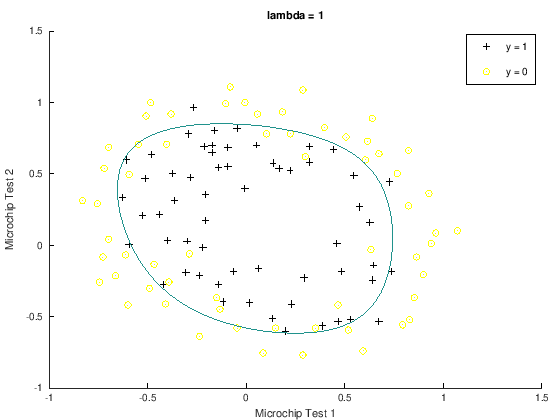

In [45]:
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

In [46]:
% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);
fprintf('Expected accuracy (with lambda = 1): 83.1 (approx)\n');

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.1 (approx)


### 2.5 Optional (ungraded) exercises

In this part of the exercise, you will get to try out different regularization
parameters for the dataset to understand how regularization prevents overfitting.
Notice the changes in the decision boundary as you vary λ. With a small λ, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data (Figure 5). This is not a good decision boundary: for example, it predicts that a point at x = (−0.25, 1.5) is accepted (y = 1), which seems to be an incorrect decision given the training set.
With a larger λ, you should see a plot that shows an simpler decision
boundary which still separates the positives and negatives fairly well. However, if λ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data

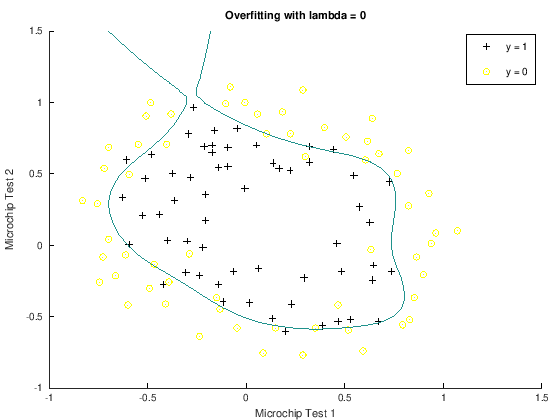

In [47]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 0;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('Overfitting with lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

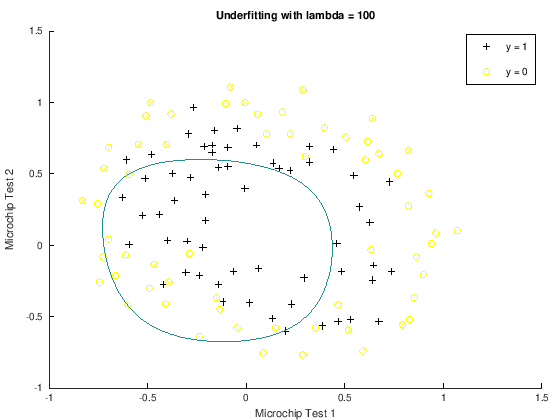

In [48]:
% Initialize fitting parameters
initial_theta = zeros(size(X, 2), 1);

% Set regularization parameter lambda to 1 (you should vary this)
lambda = 100;

% Set Options
options = optimset('GradObj', 'on', 'MaxIter', 400);

% Optimize
[theta, J, exit_flag] = ...
	fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
% Plot Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('Underfitting with lambda = %g', lambda))

% Labels and Legend
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')

legend('y = 1', 'y = 0', 'Decision boundary')
hold off;